# Simple Velocity-Heading

In [1]:
import sys

In [2]:
for _ in range(2):
    try:
        import jdrones        
    except ModuleNotFoundError:
        print("jdrones not found, installing")
        !{sys.executable} -m pip install -q git+ssh://git@github.com/iwishiwasaneagle/jdrones/

In [3]:
import gymnasium
import jdrones
import jdrones.types

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

pybullet build time: Feb  2 2023 13:13:41


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from collections import deque

In [6]:
T = 20
dt = 1/240
seed = 1337

initial_state = jdrones.types.State()
initial_state.pos = (0,0,2)

In [7]:
env = gymnasium.make("VelHeadAltDroneEnv-v0",dt=dt,initial_state=initial_state)
env = gymnasium.wrappers.TimeLimit(env, max_episode_steps=int(T/dt))

b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_link

In [8]:
observations = deque()

obs, info = env.reset(seed=seed)
setpoint = [.3,0,0,2]
trunc, term = False, False
for i in tqdm(range(int(T/dt)-1)):
    setpoint[2] = 0.4*np.sin(0.4*i*dt)
    
    obs, _, term, trunc, info = env.step(setpoint)
    observations.append(obs)

  0%|          | 0/4799 [00:00<?, ?it/s]

In [9]:
data = np.array(observations)
t = np.linspace(0,len(data)*dt,len(data))
df = pd.DataFrame(data,columns=["x","y","z","qx","qy","qz","qw","phi","theta","psi","vx","vy","vz","p","q","r","P0","P1","P2","P3"],index=t)
df.index.name = 't'
df

,x,y,z,qx,qy,qz,qw,phi,theta,psi,vx,vy,vz,p,q,r,P0,P1,P2,P3
t,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,-0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,412.02,0.000000
0.004168,0.000000e+00,0.000000e+00,2.000545,0.000000e+00,0.000036,-0.000179,1.000000,-1.279180e-08,0.000072,-0.000358,0.000000e+00,0.000000e+00,0.130800,0.000000,0.017167,-0.085837,412.02,90.512735,0.00,90.512735
0.008335,0.000000e+00,5.514537e-27,2.001949,-2.810108e-09,0.000036,-0.000458,1.000000,-3.836714e-08,0.000072,-0.000916,0.000000e+00,1.323489e-24,0.337003,-0.000006,-0.000003,-0.133946,0.00,0.000000,0.00,0.000000
0.012503,-3.349746e-16,1.198058e-19,2.003183,-5.619685e-09,0.000036,-0.000737,1.000000,-6.393040e-08,0.000072,-0.001474,-8.039389e-14,2.875338e-17,0.296053,-0.000006,-0.000003,-0.133920,0.00,0.000000,0.00,0.000000
0.016670,-1.532773e-15,9.619846e-19,2.004246,-8.428730e-09,0.000036,-0.001016,0.999999,-8.948158e-08,0.000071,-0.002032,-2.874716e-13,2.021229e-16,0.255114,-0.000006,-0.000003,-0.133895,0.00,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.979163,5.361022e+00,1.638916e-01,2.001864,-4.306678e-04,0.000119,0.209787,0.977747,-7.923217e-04,0.000413,0.422714,2.871268e-01,1.057658e-01,0.015675,0.001750,0.000128,-0.016497,0.00,0.000000,0.00,0.000000
19.983331,5.362219e+00,1.643322e-01,2.001759,-4.270444e-04,0.000118,0.209753,0.977754,-7.854557e-04,0.000411,0.422646,2.870643e-01,1.057428e-01,-0.025203,0.001749,0.000128,-0.016494,0.00,0.000000,0.00,0.000000
19.987498,5.363414e+00,1.647727e-01,2.001484,-4.234215e-04,0.000118,0.209720,0.977761,-7.785906e-04,0.000408,0.422577,2.870017e-01,1.057197e-01,-0.066073,0.001749,0.000128,-0.016492,0.00,0.000000,0.00,0.000000


In [10]:
df_long = df.melt(var_name='variable', value_name='value',ignore_index=False).reset_index()
df_long

,t,variable,value
0,0.000000,x,0.000000e+00
1,0.004168,x,0.000000e+00
2,0.008335,x,0.000000e+00
3,0.012503,x,-3.349746e-16
4,0.016670,x,-1.532773e-15
...,...,...,...
95975,19.979163,P3,0.000000e+00
95976,19.983331,P3,0.000000e+00
95977,19.987498,P3,0.000000e+00
95978,19.991666,P3,0.000000e+00


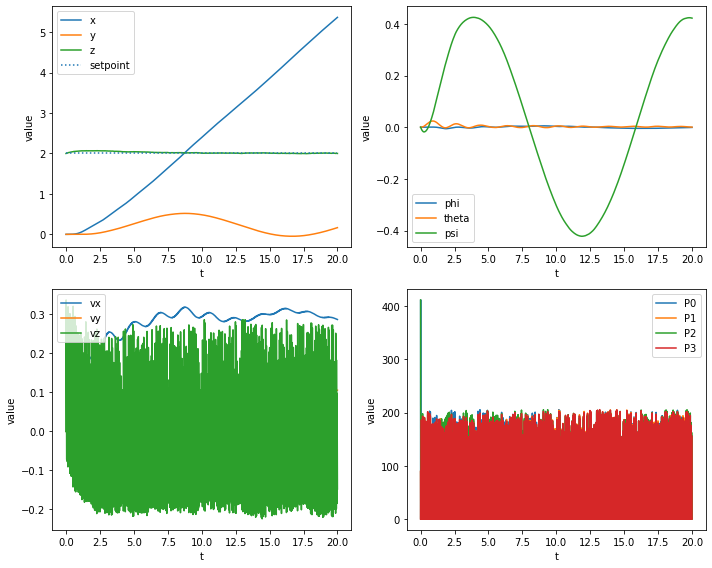

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.flatten()

sns.lineplot(data=df_long.query("variable in ('x','y','z')"), x='t',y='value',hue='variable',ax=ax[0])
ax[0].hlines(setpoint[3],df.index.min(),df.index.max(),linestyles='dotted',label="setpoint")
ax[0].legend()

sns.lineplot(data=df_long.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable',ax=ax[1])
ax[1].legend()

sns.lineplot(data=df_long.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable',ax=ax[2])
ax[2].legend()

sns.lineplot(data=df_long.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable',ax=ax[3])
ax[3].legend()

fig.tight_layout()

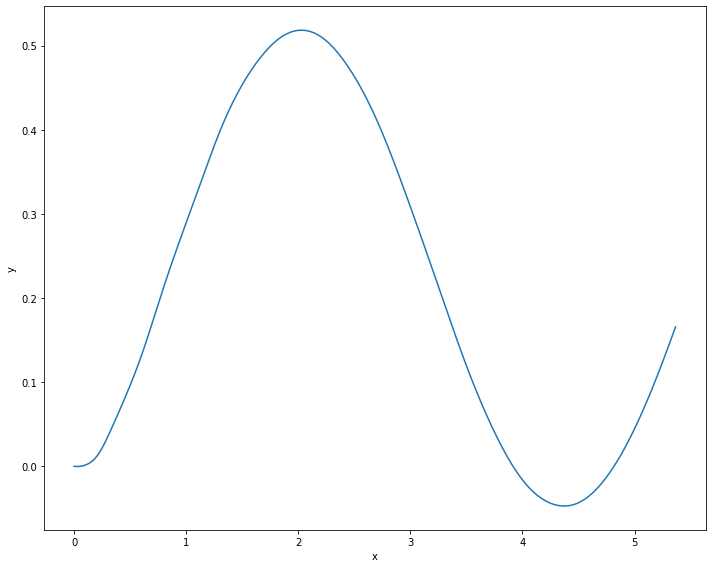

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.lineplot(data=df, x='x',y='y',ax=ax)

fig.tight_layout()